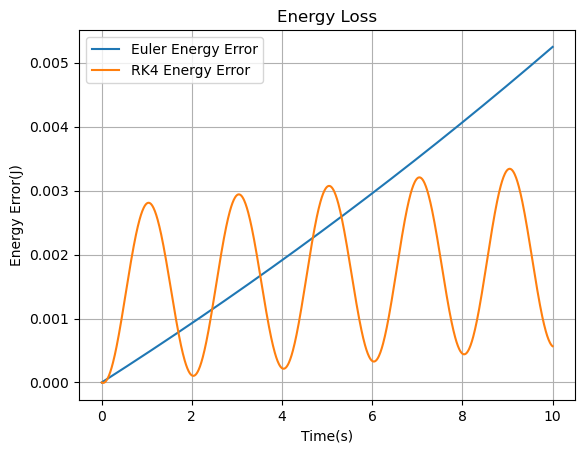

In [68]:
#LAB 2
import numpy as np
import matplotlib.pyplot as plt

#part 1 

#initial values
x0 = 0.1 #m
v0 = 0.0 #m/s
t0 = 0.0 #s
k = 3.0 #1/s^2
omega = np.sqrt(k)
del_t = 0.01
t = np.arange(0.0, 10.0+del_t, del_t)
a0 = -x0*k

xe = np.zeros(len(t) )
ve = np.zeros(len(t) )
xe[0], ve[0] = x0, v0

#euler
for i in range(1, len(t) ):
    a = -k * xe[i-1]
    ve[i] = ve[i-1] + a*del_t
    xe[i] = xe[i-1] + ve[i-1]*del_t
    
#RK4

xRK = np.zeros(len(t) )
vRK = np.zeros(len(t) )
aRK = np.zeros(len(t) )

xRK[0], vRK[0] = x0, v0

for i in range(1, len(t)):
    if i == 0:
        xRK[i] = x0
        vRK[i] = v0
        aRK[i] = a0
        continue
    # acceleration
    aRK[i] = -k*xRK[i-1]
    
    k1 = aRK[i-1]
    k2 = -k*(xRK[i-1] + (k1*del_t/2) )
    k3 = -k*(xRK[i-1] + (k2*del_t/2) )
    k4 = -k*(xRK[i-1] + (k3*del_t) )
    vRK[i] = vRK[i-1] + (del_t/6)*(k1 + 2*k2 + 2*k3 + k4)
    k1 = vRK[-1]
    k2 = vRK[i-1] - k*(xRK[i-1] + (k1*del_t/2) )*del_t 
    k3 = vRK[i-1] - k*(xRK[i-1] + (k2*del_t/2) )*del_t 
    k4 = vRK[i-1] - k*(xRK[i-1] + (k3*del_t))*del_t 
    xRK[i] = xRK[i-1] + (del_t/6)*(k1 + 2*k2 + 2*k3 + k4)
    
#energy
E0 = 0.5*k*x0**2 + 0.5*v0**2
EEuler = 0.5*ve**2 + 0.5*k*xe**2
ERK = 0.5*vRK**2 + 0.5*k*xRK**2

#plotting
plt.figure()
plt.plot(t, EEuler - E0, label = "Euler Energy Error")
plt.plot(t, ERK - E0, label = "RK4 Energy Error")
plt.xlabel("Time(s)")
plt.ylabel("Energy Error(J)")
plt.title("Energy Loss")
plt.legend()
plt.grid(True)
plt.show()

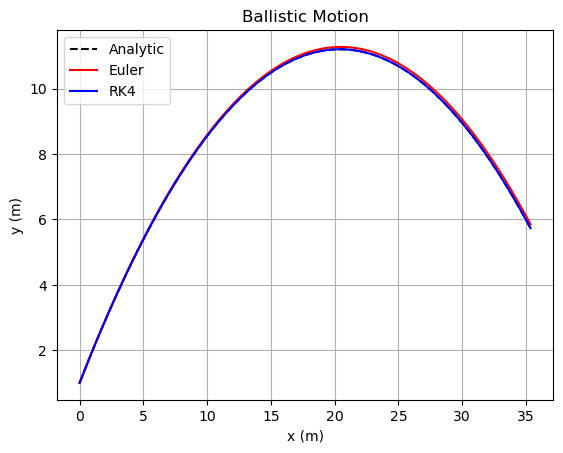

In [66]:
# part 2: ballistic motion
g = 9.8
x0 = 0.0
y0 = 1.0 
v0 = 20.0
theta = 45.0
vx0 = v0*np.cos(theta)
vy0 = v0*np.sin(theta)
del_t = 0.01
tmax = 2.5
t = np.arange(0.0, tmax+del_t, del_t)

vx0 = v0 * np.cos(np.radians(theta))
vy0 = v0 * np.sin(np.radians(theta))

xA = vx0 * t
yA = y0 + vy0*t - 0.5*g*t**2

#euler 
xe = np.zeros(len(t) )
ye = np.zeros(len(t) )
vxe = np.zeros(len(t) )
vye = np.zeros(len(t) )

xe[0] = x0
ye[0] = y0
vxe[0] = vx0
vye[0] = vy0

for i in range(1, len(t)):
    xe[i] = xe[i-1] + vxe[i-1]*del_t
    ye[i] = ye[i-1] + vye[i-1]*del_t
    vxe[i] = vxe[i-1]         
    vye[i] = vye[i-1] - g*del_t

#RK4
xRK = np.zeros(len(t))
yRK = np.zeros(len(t))
vxRK = np.zeros(len(t))
vyRK = np.zeros(len(t))

xRK[0] = x0
yRK[0] = y0
vxRK[0] = vx0
vyRK[0] = vy0

for i in range (1,len(t) ):
    def f(s):
        x, y, vx, vy = s
        return np.array([vx, vy, 0, -g])
    
    s2 = np.array([xRK[i-1], yRK[i-1], vxRK[i-1], vyRK[i-1]])
    k1 = f(s2)
    k2 = f(s2 + 0.5*del_t*k1)
    k3 = f(s2 + 0.5*del_t*k2)
    k4 = f(s2 + del_t*k3)
    
    s3 = s2 + (del_t/6)*(k1 + 2*k2 + 2*k3 + k4)
    xRK[i], yRK[i], vxRK[i], vyRK[i] = s3



plt.figure()
plt.plot(xA, yA, 'k--', label= "Analytic")
plt.plot(xe, ye, 'r-', label= "Euler")
plt.plot(xRK, yRK, 'b-', label= "RK4")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Ballistic Motion")
plt.legend()
plt.grid(True)
plt.show()

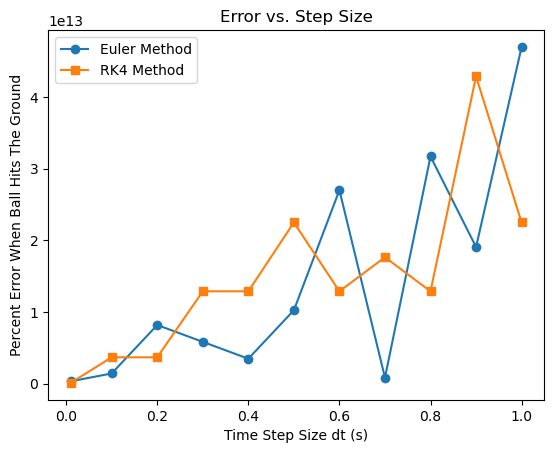

In [44]:
# part 3: percent error

g = 9.8
y0 = 100.0
v0 = 0.0
t0 = 0.0

tA = np.sqrt(2*y0/g)
yA = 0.0

#time step size
del_t = np.concatenate(([0.01], np.arange(0.1, 1.1, 0.1)))

def euler(dt):
    t = t0
    y = y0
    v = v0
    while y > 0:
        y = y + v * dt
        v = v - g * dt
        t += dt
    return y , t

def RK4(dt):
    t = t0
    y = y0
    v = v0
    while y > 0:
        def f(s):
            y , v= s
            return np.array([v,-g])
        s = np.array([y,v])
        k1 = f(s)
        k2 = f(s+0.5*dt*k1)
        k3 = f(s+0.5*dt*k2)
        k4 = f(s+dt*k3)
        s = s + (dt/6.0)*(k1+2*k2+2*k3+k4)
        y , v = s
        t+=dt
    return y , t

#error 
errorE = []
errorRK = []

for dt in del_t:
    ye , te = euler(dt)
    yRK , tRK = RK4(dt)
    #percent error for pos
    error1 = abs((ye - yA) / (yA + 1e-10)) * 100
    error2 = abs((yRK - yA) / (yA + 1e-10)) * 100
    errorE.append(error1)
    errorRK.append(error2)

plt.figure()
plt.plot(del_t, errorE, 'o-', label = "Euler Method")
plt.plot(del_t, errorRK, 's-', label = "RK4 Method")
plt.xlabel("Time Step Size dt (s)")
plt.ylabel("Percent Error When Ball Hits The Ground")
plt.title("Error vs. Step Size")
plt.legend()
plt.show()
    
        